In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle # For storing trained data

### Reading Ground truth CSV files

Read index file for filenames

In [ ]:
df = pd.read_csv("ground_truth_subjects.csv", header = None)
print(df) # We get a dataframe containing names of files

# Output : Names of dataset folders as Dataframe

Make array of Folder names of Dataset

In [ ]:
subjects = df[0].values
print(subjects)

# Output : Names of dataset folders as 1D numpy array

Get list of paths to training + testing CSV files

In [ ]:
def get_file_paths(subjects):
    # List that stores path to CSV training files
    file_paths = [] # Initiated list for storing path to dataset
    for subject in subjects:
        # ground_truth -> subject -> peizo signals
        piezo_path = f"ground_truth/{subject}/{subject[10:]}.csv"
        # ground_truth -> subject -> breathrates
        breath_path = f"ground_truth/{subject}/breathrates.csv"
        # ground_truth -> subject -> heartrates
        heart_path = f"ground_truth/{subject}/heartrates.csv"
        # ground_truth -> subject -> jpeaks
        jpeaks_path = f"ground_truth/{subject}/jpeaks.csv"
        # ground_truth -> subject -> movementvalues
        movment_path = f"ground_truth/{subject}/movementvalues.csv"
        file_paths.append((piezo_path, breath_path, heart_path, jpeaks_path, movment_path))
    return file_paths

# Training + Testing dataset addresses stored
file_paths = get_file_paths(subjects)
print(file_paths)

# Output : List of (tuples containing address of dataset CSVs)

# Visualising the data

Individual plots of peizo then breathrates

In [ ]:
for (piezo_path, breath_path, heart_path, jpeaks_path, movment_path) in file_paths:
    piezo_df = pd.read_csv(piezo_path, header = None)
    breathrate_df = pd.read_csv(breath_path, header = None)
    heartrate_df = pd.read_csv(heart_path, header = None)
    jpeaks_df = pd.read_csv(jpeaks_path, header = None)
    movment_df = pd.read_csv(movment_path, header = None)
    
    # Get values out of dataframes

    # Peizo
    piezo_reading = piezo_df[0].values
    # Breathrates
    timestamps = breathrate_df[0].values
    breath_rate = breathrate_df[1].values
    # Heartrates
    heart_rate = heartrate_df[1].values
    # jpeaks
    j_peak = jpeaks_df[0].values
    # movement_values
    movment_value = movment_df[1].values

    # Plot the Data
    # 3 lines below are just to resize the graph, No need to consider
    f = plt.figure()
    f.set_figwidth(5)
    f.set_figheight(5)
    

    plt.plot(piezo_reading)
    plt.show()
    plt.plot(timestamps, breath_rate, marker = 'o')
    plt.show()
    plt.plot(timestamps, heart_rate, marker = 'o')
    plt.show()
    plt.plot(j_peak, marker = 'o')
    plt.show()
    plt.plot(movment_value, marker = 'o')
    plt.show()

# All output plots in Folder : Data Plots\Individual quantities

### Plots for breathrate and heartrate respectively
Note: Training data considered as 1st 4 datasets

### 1. By averaging out the piezo_values

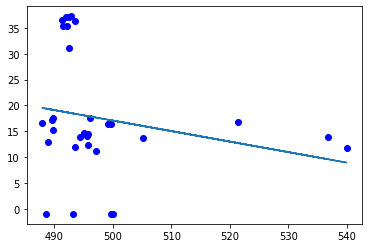

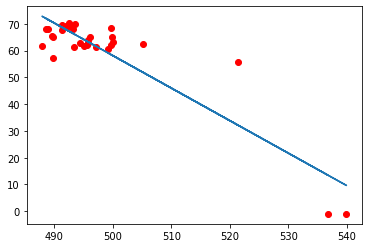

In [61]:
interval = 6780
cumu_breathrates = []
cumu_heartrates = []
cumu_piezo = []
# For 1st 4 datasets
for sub in range(4):
    # if (sub == 1) :
    #     continue
    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values # Numpy 1D array
    breathrates = pd.read_csv(file_paths[sub][1], header = None).iloc[:, 1].values # Numpy 1D array
    heartrates = pd.read_csv(file_paths[sub][2], header=None).iloc[:, 1].values
    
    cumu_breathrates += list(breathrates)
    cumu_heartrates += list(heartrates)

    x = [] # 8 membered list - Averaged out peizo

    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]
    
    cumu_piezo += x


# Just to get bigger graph
# f = plt.figure()
# # ----------------------RESIZE graph below-----------------------------
# f.set_figwidth(4)
# f.set_figheight(4)

# Plot for breathrates
plt.scatter(np.array(cumu_piezo), np.array(cumu_breathrates), color = "blue")

m, b = np. polyfit(np.array(cumu_piezo),np.array(cumu_breathrates), 1)
plt.plot(np.array(cumu_piezo), m*np.array(cumu_piezo) + b)
plt.show()

# Plot for heartrates
plt.scatter(np.array(cumu_piezo), np.array(cumu_heartrates), color = "red")

m, b = np. polyfit(np.array(cumu_piezo),np.array(cumu_heartrates), 1)
plt.plot(np.array(cumu_piezo), m*np.array(cumu_piezo) + b)
plt.show()

# Output : Plot of breathrates (BLUE) and a regression line
#          Plot of heartrates (RED) and its regression line 

Now in 2 codeblocks below are the plots excluding the error points (with value -1)

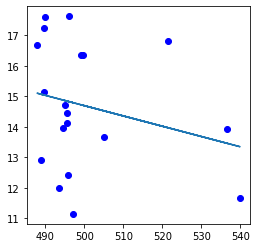

In [62]:
# remove y = -1 or y is above 30
new_piezo = []
new_breathrates = []
count = 0
for elem in np.array(cumu_breathrates):
    count +=1
    if (elem==-1 or elem>30):
        continue
    new_breathrates += [elem]
    new_piezo += [np.array(cumu_piezo)[count-1]]

# print(newX)
# print(newy)
new_piezo = np.array(new_piezo)
new_breathrates = np.array(new_breathrates)

# Just to get bigger graph
f = plt.figure()
# ----------------------RESIZE graph below-----------------------------
f.set_figwidth(4)
f.set_figheight(4)

plt.scatter(new_piezo, new_breathrates, color = "blue")


m, b = np. polyfit(new_piezo,new_breathrates, 1)
plt.plot(new_piezo, m*new_piezo+ b)
plt.show()

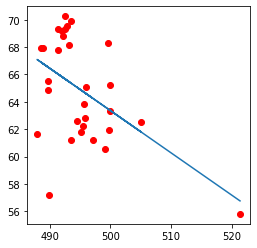

In [63]:
# remove y = -1
new_piezo = []
new_breathrates = []
new_heartrates = []
count = 0
for elem in np.array(cumu_heartrates):
    count +=1
    if (elem==-1):
        continue
    new_heartrates += [elem]
    new_piezo += [np.array(cumu_piezo)[count-1]]



# print(newX)
# print(newy)
new_piezo = np.array(new_piezo)
new_heartrates = np.array(new_heartrates)

# Just to get bigger graph
f = plt.figure()
# ----------------------RESIZE graph below-----------------------------
f.set_figwidth(4)
f.set_figheight(4)

plt.scatter(new_piezo, new_heartrates, color = "red")


m, b = np. polyfit(new_piezo,new_heartrates, 1)
plt.plot(new_piezo, m*new_piezo+ b)
plt.show()

### 2. By populating breathrates into array of 54240

In [ ]:
for data_number in range(4):
    piezo_atIndex = pd.read_csv(file_paths[data_number][0], header = None).iloc[:, 0].values # Numpy 1D array
    breathrates = pd.read_csv(file_paths[data_number][1], header = None).iloc[:, 1].values # Numpy 1D array

    interval = 6780
    y = []
    for breathrate in breathrates:
        # Get normal Dist for better results
        y += list(np.random.normal(breathrate, 4, interval))

    # Just to get bigger graph
    f = plt.figure()
    # ----------------------RESIZE graph below-----------------------------
    f.set_figwidth(4)
    f.set_figheight(4)

    # Plotting two values 
    plt.scatter(piezo_atIndex, np.array(y), color = "blue")
    plt.show()

    # All output plots in Folder : Data Plots\piezo_vs_breathrates for 54240 points

# Training regressor model

For continuous data : Breathrates, Heartrates and jpeaks

### First try by Direct linear regression (w/o removing error points)
(Probably wrong as we need to remove the error datapoints)

In [138]:
interval = 6780 # 54240 / 8
X = []
y = []

for (peizo_path, breath_path, heart_path, jpeaks_path, movment_path) in file_paths:
    piezo_vals = pd.read_csv(peizo_path, header = None).iloc[:, 0:].values
    breathrates = pd.read_csv(breath_path, header = None).iloc[:, 1:].values
    
    X += list(piezo_vals)
    for breathrate in breathrates:
        y += list(np.random.normal(breathrate, 4, interval))

X = np.array(X)
y = np.array(y)

regressor = LinearRegression()
regressor.fit(piezo_0.reshape(1, -1), y.reshape(1, -1))

AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
n = (len(piezo_0) // 8)
y = []
for breathrate in breathrates:
    y += list(np.random.normal(breathrate, 4, n))
    
y = np.array([y])
piezo_0 = [piezo_0]

regressor = LinearRegression()
regressor.fit(piezo_0, y)

MemoryError: Unable to allocate 21.9 GiB for an array with shape (54240, 54240) and data type float64

### Second try by removing error points (where brethrates are -1 or greater than 30)

# 1. Linear regression model for breathrates

In [15]:
regressor = LinearRegression()
regressor.fit(new_piezo.reshape(-1, 1), new_breathrates.reshape(-1, 1))

LinearRegression()

In [26]:
pred_data = []
cumu_breathrates =[]
# For 1st 4 datasets
for file in range(4, 6, 1):
    # if (sub == 1) :
    #     continue
    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values # Numpy 1D array
    breathrates = pd.read_csv(file_paths[sub][1], header = None).iloc[:, 1].values # Numpy 1D array

    cumu_breathrates += list(breathrates)
    x = [] # 8 membered list - Averaged out peizo

    # Average the peizo
    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]
    
    pred_data += x

pred_data = np.array(pred_data)
actual_breathrate = np.array(cumu_breathrates)
print(pred_data)

[539.9085597  499.21489676 499.64292035 505.10762534 536.69989758
 499.90412979 499.78318584 499.98436578 539.9085597  499.21489676
 499.64292035 505.10762534 536.69989758 499.90412979 499.78318584
 499.98436578]


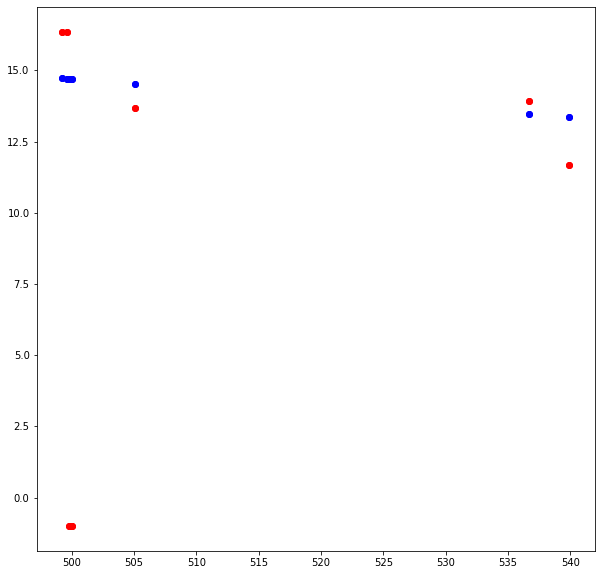

In [68]:
f = plt.figure()
# ----------------------RESIZE graph below-----------------------------
f.set_figwidth(10)
f.set_figheight(10)

pred_final = regressor.predict(pred_data.reshape(-1, 1))
# print(pred_final)
plt.scatter(pred_data.reshape(-1, 1), pred_final.reshape(-1, 1), color = "blue")
plt.scatter(pred_data.reshape(-1, 1), actual_breathrate.reshape(-1, 1), color = "red")
plt.show()

# Output : BLUE points Predicted values of breathrates
#          RED points Actual values of breathrates


In [69]:
# Finding mean squared array
difference_array = np.subtract(pred_final, actual_breathrate)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

# So large as the error points cause great difference

90.71199878697267


## 2. Linear regression model for heartrates

In [36]:
regressor_heart = LinearRegression()
regressor_heart.fit(new_piezo.reshape(-1, 1), new_heartrates.reshape(-1, 1))

LinearRegression()

Testing the model

In [39]:
pred_data = []
cumu_heartrates =[]
# For 1st 4 datasets
for file in range(4, 6, 1):
    # if (sub == 1) :
    #     continue
    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values # Numpy 1D array
    heartrates = pd.read_csv(file_paths[sub][2], header = None).iloc[:, 1].values # Numpy 1D array

    cumu_heartrates += list(heartrates)
    x = [] # 8 membered list - Averaged out peizo

    # Average the peizo
    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]
    
    pred_data += x

pred_data = np.array(pred_data)
actual_heartrate = np.array(cumu_heartrates)
print(pred_data)

[539.9085597  499.21489676 499.64292035 505.10762534 536.69989758
 499.90412979 499.78318584 499.98436578 539.9085597  499.21489676
 499.64292035 505.10762534 536.69989758 499.90412979 499.78318584
 499.98436578]


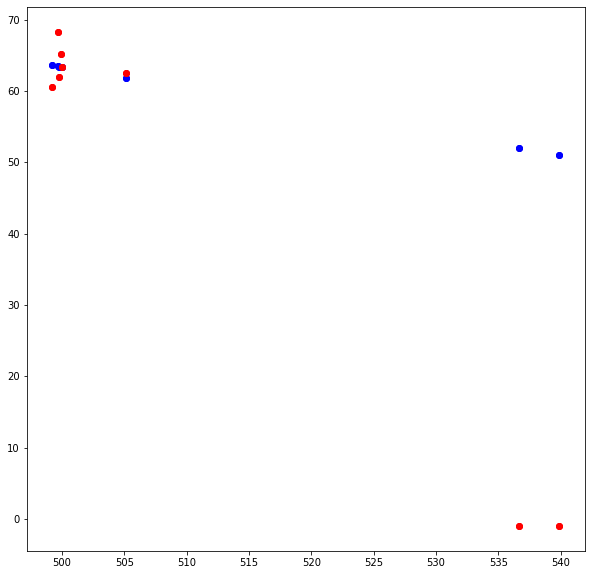

In [67]:
f = plt.figure()
# ----------------------RESIZE graph below-----------------------------
f.set_figwidth(10)
f.set_figheight(10)

pred_final_heart = regressor_heart.predict(pred_data.reshape(-1, 1))
# print(pred_final)
plt.scatter(pred_data.reshape(-1, 1), pred_final_heart.reshape(-1, 1), color = "blue")
plt.scatter(pred_data.reshape(-1, 1), actual_heartrate.reshape(-1, 1), color = "red")
plt.show()

# Output : BLUE points Predicted values of heartrates
#          RED points Actual values of heartrates

Using pickle to save state of the trained model

In [ ]:
# Testing out if pickle works

X = np.array([[7], [8], [7], [4], [2], [7], [3], [8], [5]])
y = np.array([17, 16, 25, 67, 56, 87, 34, 54, 23])
model = LinearRegression()
model.fit(X, y)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
saved_model = pickle.load(open(filename, 'rb'))
saved_model.predict(np.array([[9]]))

array([34.80555556])

## Classification
For discrete data : Movement values

### Visualisation

In [ ]:
for (piezo_path, breath_path, heart_path, jpeaks_path, movment_path) in file_paths:
    piezo_df = pd.read_csv(piezo_path, header = None)
    movment_df = pd.read_csv(movment_path, header = None)
    
    # Get values out of dataframes

    # Peizo
    piezo_reading = piezo_df[0].values
    # movement_values
    movment_value = movment_df[1].values

    # Plot the Data
    # 3 lines below are just to resize the graph, No need to consider
    f = plt.figure()
    f.set_figwidth(5)
    f.set_figheight(5)
    
    # movemnt values array change
    new_movment_value = []
    for movment in movment_value:
        new_movment_value += [movment*200+400]*226
    new_movment_value = np.array(new_movment_value)

    plt.plot(piezo_reading)
    plt.plot(new_movment_value, marker = 'o', color ="red")
    plt.show()

    # All output plots in Folder : Data Plots\peizo_and_movement_values

# Training the classifier model

# Optimising the models, both regressor and classifier (if possible)

# Done :)